# **Multiple Linear Regression**
Multiple linear regression involves more than one independent variable and one dependent variable.

# Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Import data

In [2]:
# Get dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# Analyze data

## Describe

In [3]:
# Describe data
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## Distribution

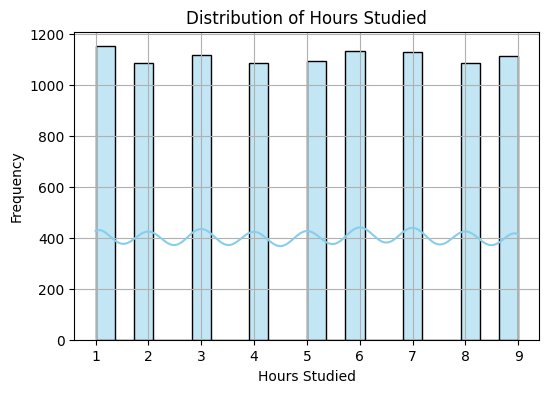

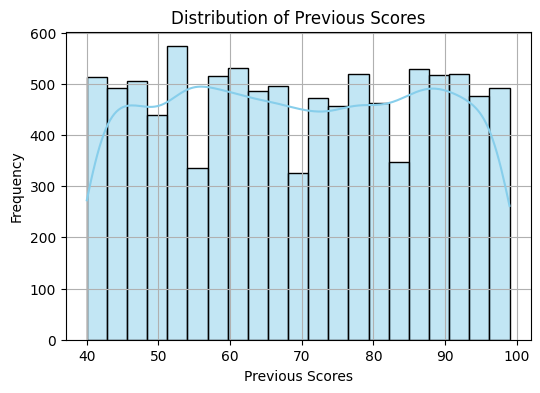

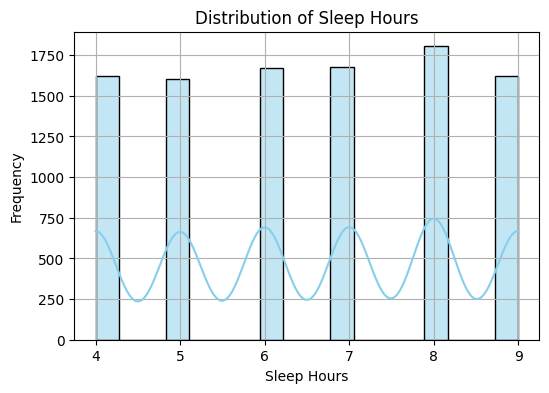

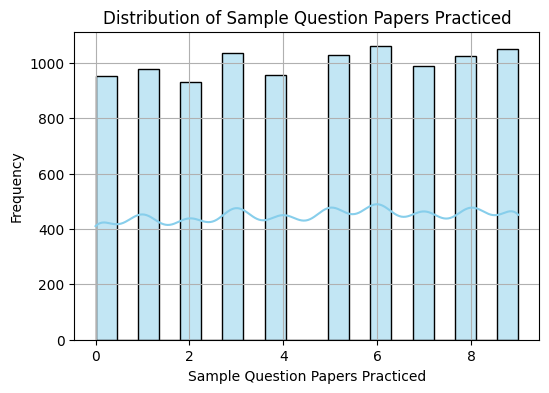

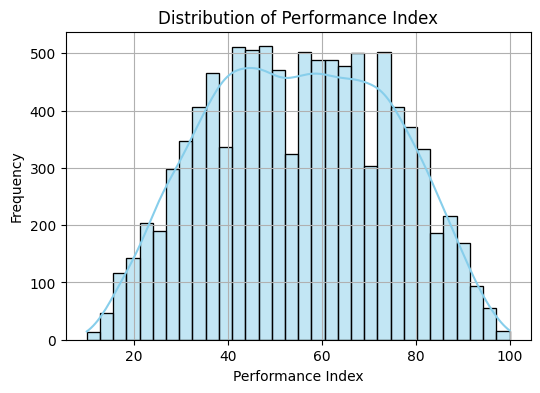

In [4]:
# Loop through all numeric features
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Split data

## Split into Independent/Dependent variables

In [5]:
# Label Encoding for categorical features
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Features and Target
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

In [8]:
y

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0
...,...
9995,23.0
9996,58.0
9997,74.0
9998,95.0


## Split into Train/Test sets

In [9]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)




# Train model

In [10]:
# Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predict results

In [11]:
# Prediction result
y_pred_test = model.predict(X_test)     # predicted value of y_test
y_pred_train = model.predict(X_train)   # predicted value of y_train

# Visualize predictions

## Prediction on training set

Train R² Score: 98.87%
Test R² Score: 98.90%


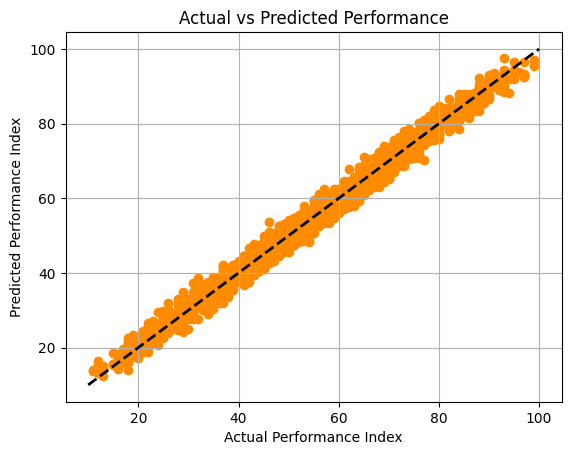

In [ ]:
# Accuracy (R²)
train_r2 = r2_score(y_train, y_pred_train) * 100
test_r2 = r2_score(y_test, y_pred_test) * 100

print(f"Train R² Score: {train_r2:.2f}%")
print(f"Test R² Score: {test_r2:.2f}%")

# Optional: Plot actual vs predicted (Test Set)
plt.scatter(y_test, y_pred_test, color='darkorange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted Performance')
plt.grid(True)
plt.show()
